<a href="https://colab.research.google.com/github/Olumide1472/Projects/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **AlexNet**

The AlexNet model is a landmark in image recognition technology, employing convolutional neural networks (CNNs) to set new standards in the ImageNet competition in 2012. AlexNet stand out in the following ways:

**Deep Structure:** It has five convolutional layers for pattern recognition, followed by three fully connected layers, allowing it to learn complex features in images.


**ReLU Activation:** Utilizes the Rectified Linear Unit (ReLU) technique for faster and more effective learning, overcoming the limitations of previous methods.


**Overlapping Pooling:** This approach captures the essential features more efficiently by allowing the pooling regions to overlap, helping reduce network size and prevent overfitting.


**Dropout Technique:** Randomly ignores parts of the network during training to prevent overfitting and ensure the model generalizes well to new data.


**GPU Training:** Uses two NVIDIA GTX 580 graphics cards for faster processing, enabling it to manage a larger and more complex network efficiently.


**Impact:** AlexNet’s success highlighted the effectiveness of deep CNNs in image classification, inspiring further research and advancements in the field.


**Training Innovations:** Besides its architecture, AlexNet introduced faster training with ReLU, dropout for robustness, and GPU acceleration. It also used data augmentation methods to enhance the model’s ability to generalize from training data to new, unseen data.









**Reference:**
*A. Krizhevsky, I. Sutskever, and G. E. Hinton, “ImageNet Classification with Deep Convolutional Neural Networks,” Communications of the ACM, vol. 60, no. 6, pp. 84–90, May 2012, doi: https://doi.org/10.1145/3065386.*


# **Importing Data Set from Kaggle**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kooshy007","key":"f676dd80b0760232f5e915139e7716dc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 99% 372M/376M [00:03<00:00, 124MB/s]
100% 376M/376M [00:03<00:00, 111MB/s]


In [ ]:
!unzip animal-image-datasetdog-cat-and-panda.zip -d dataset

# **Importing Libraries**

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory




# **Model Architecture**



In [ ]:
# Define your labels here
labels = ['cats', 'dogs', 'panda']

# Path to your dataset
dataset_path = '/content/dataset/animal'
# Corrected: Use dataset_path for image_folder
image_folder = dataset_path
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

# Initialize the ImageDataGenerator class and specify the test/train split
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Augmentation: rotate images
    width_shift_range=0.2,  # Augmentation: horizontal shift
    height_shift_range=0.2,  # Augmentation: vertical shift
    horizontal_flip=True,  # Augmentation: flip images horizontally
    validation_split=0.2  # 80/20 split for training/testing
)

# Prepare data generators for training and validation
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images to match model's expected input
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify as training data
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


# **Implementing the Kaggle Model Backbone**

In [ ]:
# Number of classes
num_classes = train_generator.num_classes

# Create the model using TensorFlow Hub's KerasLayer for MobileNetV2
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Model from TF Hub, set as non-trainable
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

m.build([None, 224, 224, 3])  # Batch input shape.

# Compile the model
m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])


# **Training and Fine-Tuning and Model Evaluation**

In [ ]:
# Train and fine-tune the model
history = m.fit(
    train_generator,
    epochs=10,  # Adjust number of epochs
    validation_data=validation_generator
)


Epoch 1/10
75/75 [==============================] - 166s 2s/step - loss: 0.7959 - accuracy: 0.6829 - val_loss: 0.5399 - val_accuracy: 0.8150
Epoch 2/10
75/75 [==============================] - 158s 2s/step - loss: 0.3817 - accuracy: 0.9025 - val_loss: 0.3070 - val_accuracy: 0.9317
Epoch 3/10
75/75 [==============================] - 146s 2s/step - loss: 0.2422 - accuracy: 0.9521 - val_loss: 0.2316 - val_accuracy: 0.9367
Epoch 4/10
75/75 [==============================] - 170s 2s/step - loss: 0.1879 - accuracy: 0.9596 - val_loss: 0.1808 - val_accuracy: 0.9550
Epoch 5/10
75/75 [==============================] - 148s 2s/step - loss: 0.1491 - accuracy: 0.9650 - val_loss: 0.1539 - val_accuracy: 0.9617
Epoch 6/10
75/75 [==============================] - 159s 2s/step - loss: 0.1295 - accuracy: 0.9671 - val_loss: 0.1413 - val_accuracy: 0.9617
Epoch 7/10
75/75 [==============================] - 157s 2s/step - loss: 0.1153 - accuracy: 0.9742 - val_loss: 0.1169 - val_accuracy: 0.9783
Epoch 8/10
75

In [ ]:
# Evaluate the model on the test data
results = m.evaluate(validation_generator, batch_size=32)
print("Test loss, test acc:", results)


19/19 [==============================] - 41s 2s/step - loss: 0.1018 - accuracy: 0.9700
Test loss, test acc: [0.10180948674678802, 0.9700000286102295]


# **Plotting Training And Validation Accuracy and Loss**

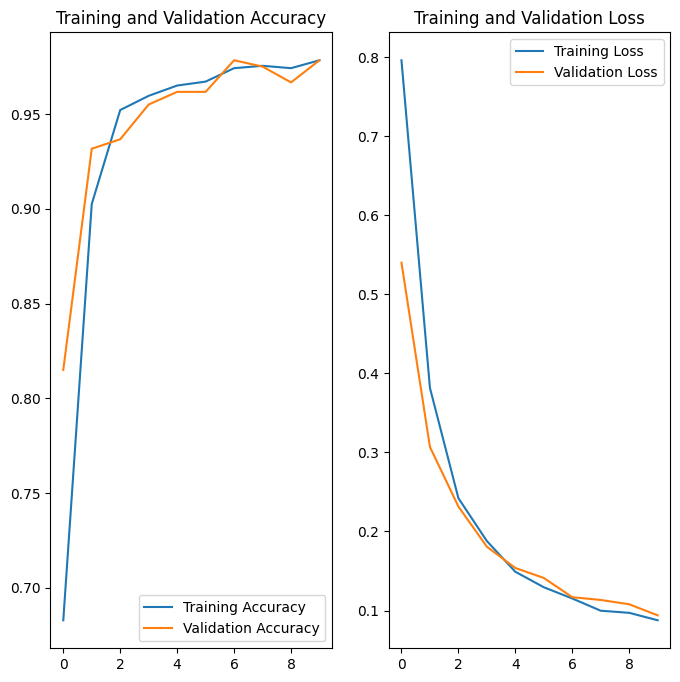

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Summary and Findings**

**Findings**

it appears there are no significant signs of overfitting or underfitting. The accuracy chart shows the training and test accuracies are both high and close together, while the loss chart indicates both training and test losses decrease and stabilize at a low level. This suggests the model generalizes well.

